In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
import seaborn as sns

In [12]:
data = pd.read_csv('QVI_data.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [16]:
# query = '''
#     SELECT *
#     FROM data
#     WHERE STORE_NBR IN (77, 88, 86)
#     '''

# data_stores_77_86_88 = ps.sqldf(query)

# data_stories_77_86_88 = data.query('STORE_NBR in [77, 88, 86]')

data_stores_77_86_88 = data[data['STORE_NBR'].isin([77, 88, 86])]

In [17]:
data_stores_77_86_88.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
1,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
2,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
3,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
4,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream


In [65]:
query = '''
    SELECT STORE_NBR AS store,
           COUNT(DISTINCT LYLTY_CARD_NBR) AS customers
    FROM data_stores_77_86_88
    GROUP BY STORE_NBR
    ORDER BY customers DESC
    '''

total_number_of_customers = ps.sqldf(query)

# total_number_of_customers = data_stores_77_86_88.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique().reset_index(name='customers')

# total_number_of_customers = total_number_of_customers.sort_values('customers', ascending=False)

# total_number_of_customers = total_number_of_customers.rename(columns={'STORE_NBR': 'store'})


In [115]:
query = '''
    WITH CTE AS (
        SELECT STORE_NBR AS store, COUNT(DISTINCT LYLTY_CARD_NBR) AS customers
        FROM data
        GROUP BY STORE_NBR
        )

    SELECT ROUND(AVG(customers), 0) as average
    FROM CTE
    '''

avg_number_of_customers = ps.sqldf(query)

# avg_number_of_customers = data.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique().mean().round(0)

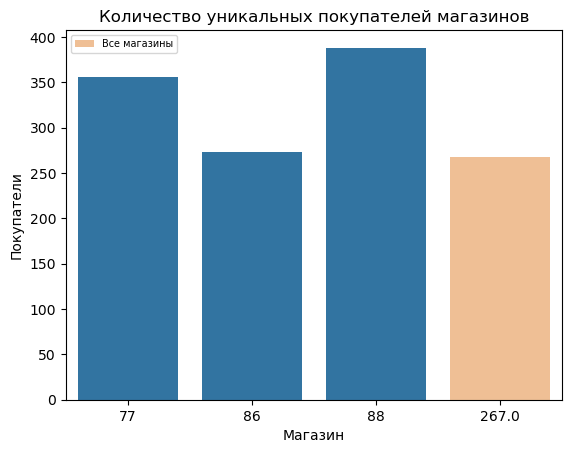

In [116]:
sns.barplot(x='store', y='customers', data=total_number_of_customers)
sns.barplot(x='average', y='average', data=avg_number_of_customers, label='Все магазины', alpha=0.5)
plt.xlabel('Магазин')
plt.ylabel('Покупатели')
plt.title('Количество уникальных покупателей магазинов')
plt.legend(loc='upper left', fontsize=7)
plt.show()

In [110]:
query = '''
    SELECT STORE_NBR AS store,
           SUM(TOT_SALES) AS total_sum
    FROM data_stores_77_86_88
    GROUP BY STORE_NBR
    ORDER BY total_sum DESC 
    '''

total_sales = ps.sqldf(query)
total_sales

,store,total_sum
0,88,16333.25
1,86,10635.35
2,77,3040.00


In [112]:
query = '''
    WITH CTE AS (
        SELECT STORE_NBR AS store, SUM(TOT_SALES) AS total_sum
        FROM data
        GROUP BY STORE_NBR
        )

    SELECT ROUND(AVG(total_sum), 0) as average
    FROM CTE
    '''

avg_total_sales_all_store = ps.sqldf(query)
avg_total_sales_all_store

,average
0,7107.0


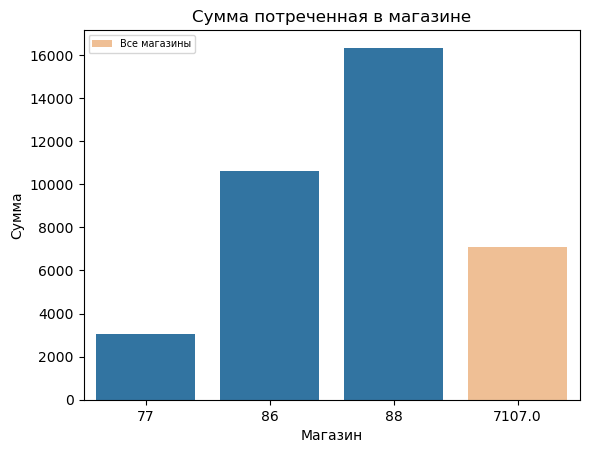

In [113]:
sns.barplot(x='store', y='total_sum', data=total_sales)
sns.barplot(x='average', y='average', data=avg_total_sales_all_store, label='Все магазины', alpha=0.5)
plt.xlabel('Магазин')
plt.ylabel('Сумма')
plt.title('Сумма потреченная в магазине')
plt.legend(loc='upper left', fontsize=7)
plt.show()